In [1]:
import os

import scipy
from scipy import stats
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=120)

<Figure size 960x960 with 0 Axes>

<Figure size 960x960 with 0 Axes>

## Загрузка данных

In [2]:
paths = glob.glob(f"t1_statistic/*results*.csv")

In [3]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data = pd.concat((data, item), ignore_index=True)

## Первичная статистика ускорителя

In [4]:
data

,name,x,y,z,vx,vy,vz,E
0,gamma,8.62687,18.78030,42.0000,0.412310,0.630440,1.545860,1.719630
1,gamma,-2.03114,-17.43970,42.0000,-0.073924,-0.555033,1.377330,1.338980
2,e-,-2.29100,-19.39070,46.8415,0.350289,-0.139860,0.175045,0.139984
3,gamma,-8.38571,-17.99460,42.0000,-0.370910,-0.762739,1.810360,1.999180
4,gamma,-18.99940,-3.01534,42.0000,-0.779771,-0.095880,1.974190,2.124780
...,...,...,...,...,...,...,...,...
79755,gamma,16.77760,17.45930,42.0000,0.159657,0.118082,0.336371,0.291491
79756,e-,19.03990,19.13250,46.7663,0.312245,0.048060,0.106323,0.000000
79757,gamma,-12.25650,-19.14420,42.0000,-0.127816,-0.184392,0.462301,0.513868
79758,gamma,-5.31675,14.18350,42.0000,-0.228585,0.456960,1.921820,1.822860


In [5]:
l = len(data)
res = []
for name in set(data['name']):
    count = len(data[data['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,gamma,49383,61.914493
1,nu_e,987,1.237462
2,O17,1,0.001254
3,neutron,2894,3.628385
4,e-,22186,27.815948
5,anti_nu_e,1149,1.440572
6,proton,1973,2.473671
7,e+,391,0.490221
8,O16,796,0.997994


In [23]:
center = data[(-2.5 < data['x']) & (data['x'] < 2.5) & (-2.5 < data['y']) & (data['y'] < 2.5)]
l = len(center)
print(l)
res = []
for name in set(center['name']):
    count = len(center[center['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

6704


,name,count,percent
0,anti_nu_e,19,0.283413
1,gamma,3776,56.324582
2,O17,1,0.014916
3,e+,98,1.461814
4,proton,69,1.029236
5,O16,97,1.446897
6,nu_e,13,0.193914
7,neutron,101,1.506563
8,e-,2530,37.738663


## Распределение по координатам

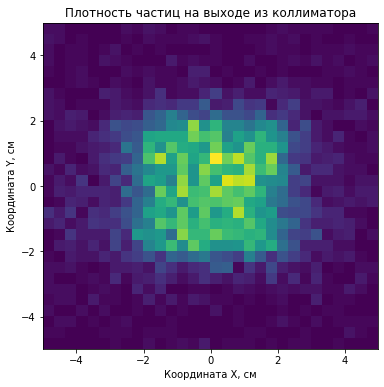

In [7]:
center = data[(-5 < data['x']) & (data['x'] < 5) & (-5 < data['y']) & (data['y'] < 5)]
plt.rcParams["figure.figsize"] = (6,6)
plt.hist2d(center['x'], center['y'], bins=30)
plt.title('Плотность частиц на выходе из коллиматора')
plt.xlabel('Координата X, см')
plt.ylabel('Координата Y, см')
plt.show()

## Распределение по энергиям (взяты только гамма и электроны)

In [25]:
center = data[(-4 < data['x']) & (data['x'] < 4) & (-4 < data['y']) & (data['y'] < 4)]

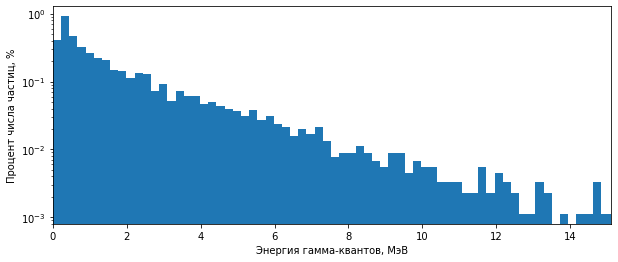

In [48]:
center_gamma = center[center['name'] == 'gamma']
plt.rcParams["figure.figsize"] = (10,4)
plt.hist(center_gamma['E'], bins=100, density=True)
plt.yscale('log')
plt.xlim([0, 15.1])
plt.ylabel('Процент числа частиц, %')
plt.xlabel('Энергия гамма-квантов, МэВ')
plt.show()

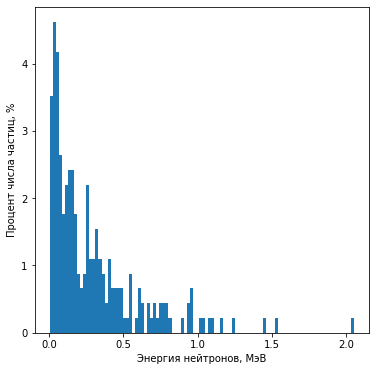

In [12]:
center_e = center[center['name'] == 'neutron']
plt.hist(center_e['E'], bins=100, density=True)
# plt.xlim([0, 15.1])
plt.ylabel('Процент числа частиц, %')
plt.xlabel('Энергия нейтронов, МэВ')
#plt.yscale('log')
plt.show()

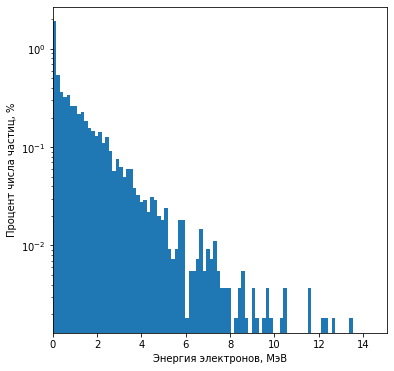

In [11]:
center_e = center[center['name'] == 'e-']
plt.hist(center_e['E'], bins=100, density=True)
plt.xlim([0, 15.1])
plt.ylabel('Процент числа частиц, %')
plt.xlabel('Энергия электронов, МэВ')
plt.yscale('log')
plt.show()

# Подвал

## Распределение по скоростям

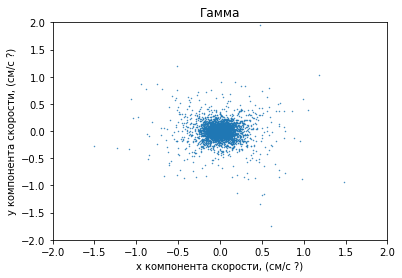

In [23]:
plt.scatter(center_gamma['vx'], center_gamma['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Гамма')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

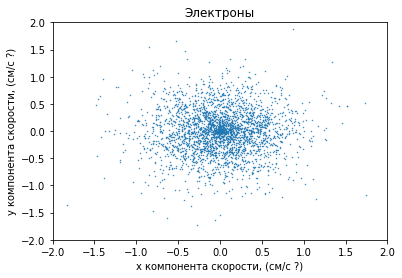

In [24]:
plt.scatter(center_e['vx'], center_e['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Электроны')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

## Визуализация векторов скоростей

In [61]:
to_viz = center_gamma[['x','y','z', 'vx','vy','vz']]

In [62]:
to_viz = to_viz[:500].T.to_numpy()
to_viz.shape

(6, 500)

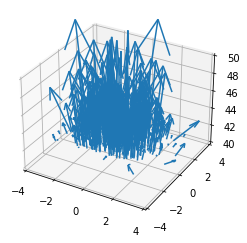

In [63]:
X, Y, Z, U, V, W = [to_viz[cor_vel] for cor_vel in range(len(to_viz))]
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_proj_type('persp')
ax3d.quiver(X, Y, Z, U, V, W)
ax3d.set_xlim([-4, 4])
ax3d.set_ylim([-4, 4])
ax3d.set_zlim([40, 50])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = center['x'], center['y']
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()